In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 
from scipy import optimize
import fredetry as fr
import rigtigny as rn

# Assigment model project
Ramsey model: Finding the optimal growth for a cloaed, neo-classic economy. The agents in this economy are identical competetive firms and a large number of identical households. This model differentiates from the Solow model where it is assumed to be a fixed savings rate, by defining the savings behavior through the intertempotal utility function of the consumer.

# Defining the model:
Please note, that all lower case variables are in per capita terms

The profit function the firms maximize: 
$$\pi^F(K_t,L_t)=K^\alpha_tL^{1-\alpha}-w_tL_t-r_tK_t$$
$0<\alpha<1$

Where: 
$K_t$ is the level of capital stock\
$L_t$ is the quantity of labor employed\
$\alpha$ is the capital's share of output\
$(1-\alpha)$ is the labor's share of output\
$w_t$ is the wage rate, cost of labor\
$r_t$ is the rental rate of capital, the cost of capital\

The intertemporal untility function of the consumer subject to their dynamic budget constraint:
$$U=\sum^\infty_{t=0}\beta^t\frac{c_t^{1-\theta}}{1-\theta} \quad \text{s.t.} \quad c_t + a_{t+1} = w_t+(1+r_t)a_t \Leftrightarrow U=\sum^\infty_{t=0}\beta^t\frac{c_t^{1-\theta}}{1-\theta} \quad \text{s.t.} \quad c_t + k_{t+1} = w_t+(1+r_t)k_t$$
Assumptions: $a_0>0$, $0<\beta<1$, and due to market clearing $a_t = k_t$\
Where:
$c_t$ is the per-capita consumption\
$a_t$ is wealth\
$U$ the utility of the consumer\
$\beta$ is the discount factor, expressing the individual's preference for present consumption over future consumption\
$\theta$ is the coefficient of relative risk aversion\


Capital accumulation is given by:
$$ k_{t+1} = w_{t} + (1-r_{t})*k_{t} - c_{t]}$$
Here $r_t = r^k + \delta$, where $r^k$ refer to the price of capital and $\delta$ is the depreciation rate of capital

First we find how much capital and labor a firm demands at given factor prices by solving the firms maximization problem: 

$$\frac{\partial\pi^F(K_t,L_t)}{\partial L}=(1-\alpha)\left(\frac{K_t^\alpha}{L_t^\alpha}\right)-w_t=(1-\alpha)k^\alpha_t-w_t=0\Leftrightarrow $$ 
$$w_t=(1-\alpha)k^\alpha_t$$
The firm maximizes their labor, when the marginal products is equal to the wages, $w_t$. 
$$\frac{\partial\pi^F(K_t,L_t)}{\partial K}=\alpha\left(\frac{K_t^{\alpha-1}}{L_t^{\alpha-1}}\right)-r_t=\alpha k_t^{\alpha-1}-r_t=0\Leftrightarrow$$ 
$$ r_t=\alpha k_t^{\alpha-1}$$
The firm maximizes their capital, when the marginal products is equal to the price of capital, $r_t$. 



Using the Lagrainian we get the Euler equation, which makes the consumer indifferent between consuming one more unit today and saving the unit, thus consuming it in the future: 
$$\mathcal{L}(c_t,a_{t+1},\lambda)=\sum^\infty_{t=0}\beta^t[\frac{1}{1-\theta}c_t^{1-\theta}+\lambda_t(w_t+(1+r_t)a_t-c_t-a_{t+1})]$$
FOC w.r.t. $c_t$:
$$\frac{\partial \mathcal{L}}{\partial c_t}=\beta^t\frac{1-\theta}{1-\theta}c_t^{1-\theta-1}-\beta^t\lambda_t=0\Leftrightarrow \lambda_t = c^{-\theta}_t $$
FOC w.r.t. $a_{t+1}$:
$$\frac{\partial\mathcal{L}}{\partial a_{t+1}}=-\beta^t\lambda_t+\beta^{t+1}\lambda_{t+1}(1+r_{t+1})=0\Leftrightarrow \lambda_t = \beta(1+r_{t+1})\lambda_{t+1}$$


Combining the derivatives above give us the Euler equation: 
$$\frac{c_{t+1}}{c_t}=(\beta(1+r_{t+1}))^\frac{1}{\theta}$$
Which states that the marginal rate of substitution between the marginal utility of today and the future marginal utility is equal to the relative price of consumption. This insures equality between the future value of the discounted marginal utility of time $t+1$ and the marginal utility of time $t$. 


# Steady state equations
Following equations (loci) are the steady state values of the economy found by the above equations:\
c-locus:
$$k^*=(\frac{\beta \alpha}{1-\beta})^\frac{1}{1-\alpha}$$
We notice, that the c-locus is independent of c, meaning graphically it will be a vertical line. 
k-locus:
$$c^*=k^\alpha$$
We see, that the k-locus won't depreciate after a certain point in time. It will grow continuously. 

# analysis 
To countries A and B. A has certain values of the parameters alpha and beta - reprecenting a high income country. B represents a low income country compared to A, when analysing alpha. Lower for country B. 
After checking what happens, when both countries have the same alpha, but the beta changes. 
Maybe make a table which shows the different values of each country

# Country A (alpha = 0.4, beta = 0.9)

In [2]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.40
ramsey_model.par.beta = 0.90

k_star, c_star, w_star, rk_star, y_star, = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)



k_star: 8.456114104924751
c_star: 2.348920584701319
w_star: 1.4093523508207915
rk_star: 0.11111111111111108
y_star: 2.348920584701319


Text(8.6, 0.95, 'c lokus')

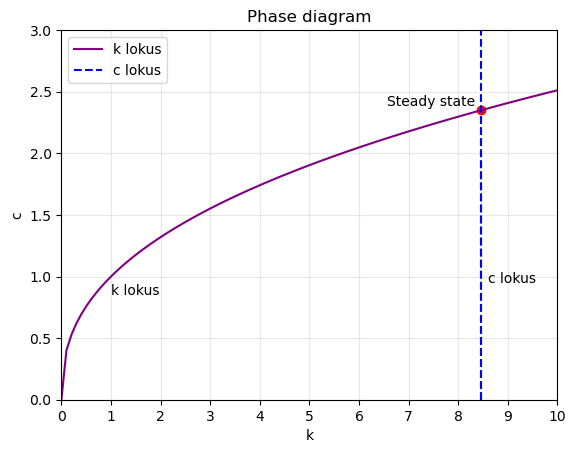

In [3]:
# Plot
k = np.linspace(0, 10, 100)
c = fr.c_lokus(fr.params["model1"]["alpha"], fr.params["model1"]["beta"])
fig, ax = plt.subplots()
ax.plot(k, fr.k_lokus(k, fr.params["model1"]["alpha"]), color="purple", label="k lokus")
ax.plot([c, c], [fr.k_lokus(0, fr.params["model1"]["alpha"]), fr.k_lokus(c, fr.params["model1"]["alpha"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ss[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ss[0], fr.ss[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 10])  # Set x-axis limits from 0 to 0.5
ax.set_xticks(np.arange(0, 11, 1))  # Adjust x-axis tick positions
ax.set_ylim([0, 3])  
ax.set_yticks(np.arange(0, 3.5, 0.5))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ss[0]-1.9, fr.ss[1]+0.04, "Steady state")
ax.text(1.0, 0.85, "k lokus")
ax.text(8.6, 0.95, "c lokus")


# Country B1 (alpha = 0.2, beta = 0.9)

In [4]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.20
ramsey_model.par.beta = 0.90

k_star, c_star, w_star, rk_star, y_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)


k_star: 2.0849259335188854
c_star: 1.1582921852882693
w_star: 0.9266337482306155
rk_star: 0.11111111111111105
y_star: 1.1582921852882693


Text(2.15, 0.2, 'c lokus')

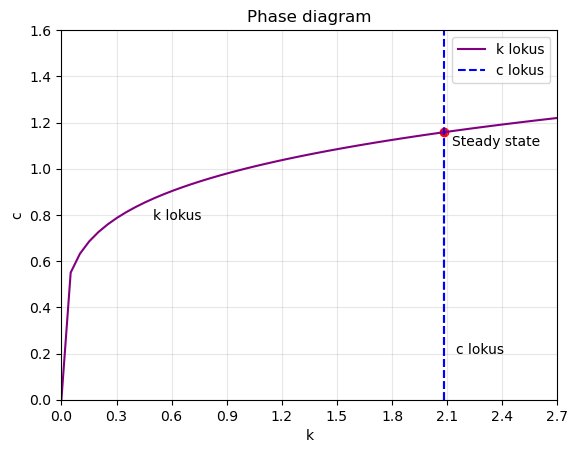

In [5]:
# Plot
kB1 = np.linspace(0, 5, 100)
cB1 = fr.c_lokusB1(fr.paramsB1["modelB1"]["alphaB1"], fr.paramsB1["modelB1"]["betaB1"])
fig, ax = plt.subplots()
ax.plot(kB1, fr.k_lokusB1(kB1, fr.paramsB1["modelB1"]["alphaB1"]), color="purple", label="k lokus")
ax.plot([cB1, cB1], [fr.k_lokusB1(0, fr.paramsB1["modelB1"]["alphaB1"]), fr.k_lokusB1(cB1, fr.paramsB1["modelB1"]["alphaB1"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ssB1[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ssB1[0], fr.ssB1[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 2.7])  # Set x-axis limits from 0 to 0.5
ax.set_xticks(np.arange(0, 3.0, 0.3))  # Adjust x-axis tick positions
ax.set_ylim([0, 1.6])  
ax.set_yticks(np.arange(0, 1.7, 0.2))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ssB1[0]+0.04, fr.ssB1[1]-0.06, "Steady state")
ax.text(0.5, 0.78, "k lokus")
ax.text(2.15, 0.2, "c lokus")

# Country B1 (alpha = 0.4, beta = 0.5)

In [6]:
ramsey_model = rn.Ramseymodelclass()

ramsey_model.par.alpha = 0.40
ramsey_model.par.beta = 0.50

k_star, c_star, w_star, rk_star, y_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)


k_star: 0.21715340932759253
c_star: 0.5428835233189813
w_star: 0.32573011399138874
rk_star: 1.0
y_star: 0.5428835233189813


Text(0.22, 0.2, 'c lokus')

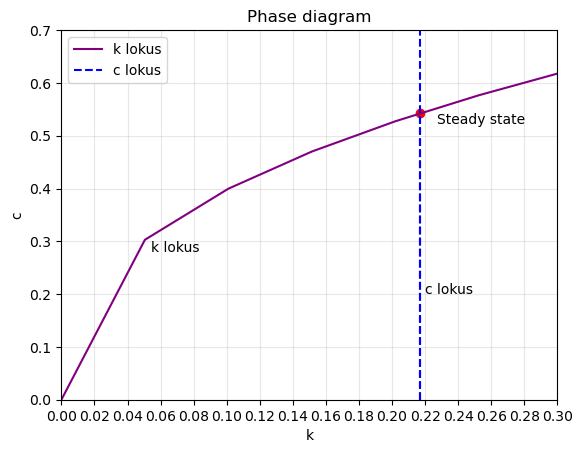

In [7]:
# Plot
kB2 = np.linspace(0, 5, 100)
cB2 = fr.c_lokusB2(fr.paramsB2["modelB2"]["alphaB2"], fr.paramsB2["modelB2"]["betaB2"])
fig, ax = plt.subplots()
ax.plot(kB2, fr.k_lokusB2(kB2, fr.paramsB2["modelB2"]["alphaB2"]), color="purple", label="k lokus")
ax.plot([cB2, cB2], [fr.k_lokusB2(0, fr.paramsB2["modelB2"]["alphaB2"]), fr.k_lokusB2(cB2, fr.paramsB2["modelB2"]["alphaB2"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ssB2[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ssB2[0], fr.ssB2[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 0.3])  # Set x-axis limits from 0 to 0.5
ax.set_xticks(np.arange(0, 0.32, 0.02))  # Adjust x-axis tick positions
ax.set_ylim([0, 0.7])
ax.set_yticks(np.arange(0, 0.8, 0.1))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ssB2[0]+0.01, fr.ssB2[1]-0.02, "Steady state")
ax.text(0.054, 0.28, "k lokus")
ax.text(0.22, 0.2, "c lokus")


Plotting all graphs in the same chart - compare them 

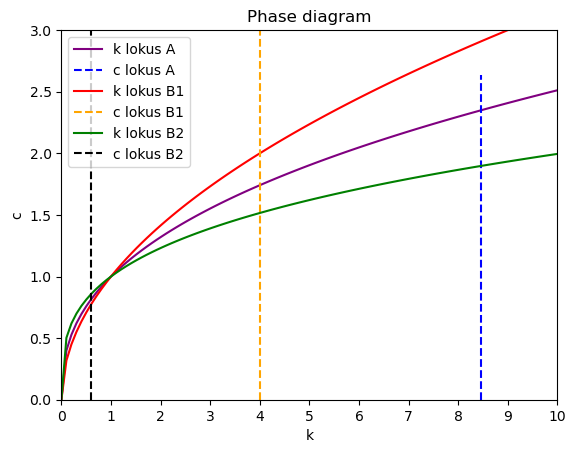

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Ramseymodelclass:
    def __init__(self):
        self.par = {
            "model1": {"alpha": 0.4, "beta": 0.9},
            "modelB1": {"alphaB1": 0.5, "betaB1": 0.8},
            "modelB2": {"alphaB2": 0.3, "betaB2": 0.7}
        }
        self.ss = (1, 1)
        self.ssB1 = (0.5, 0.5)
        self.ssB2 = (0.2, 0.1)

    @staticmethod
    def k_lokus(k, alpha):
        return k ** alpha

    def c_lokus(self, alpha, beta):
        return ((beta * alpha) / (1 - beta)) ** (1 / (1 - alpha))

    def c_lokusB1(self, alphaB1, betaB1):
        return ((betaB1 * alphaB1) / (1 - betaB1)) ** (1 / (1 - alphaB1))

    def c_lokusB2(self, alphaB2, betaB2):
        return ((betaB2 * alphaB2) / (1 - betaB2)) ** (1 / (1 - alphaB2))

ramsey_model = Ramseymodelclass()

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot for model 1
k = np.linspace(0, 10, 100)
c = ramsey_model.c_lokus(ramsey_model.par["model1"]["alpha"], ramsey_model.par["model1"]["beta"])
ax.plot(k, ramsey_model.k_lokus(k, ramsey_model.par["model1"]["alpha"]), color="purple", label="k lokus A")
ax.plot([c, c], [0, ax.get_ylim()[1]], "--", color="blue", label="c lokus A")

# Plot for model B1
kB1 = np.linspace(0, 10, 100)
cB1 = ramsey_model.c_lokusB1(ramsey_model.par["modelB1"]["alphaB1"], ramsey_model.par["modelB1"]["betaB1"])
ax.plot(kB1, ramsey_model.k_lokus(kB1, ramsey_model.par["modelB1"]["alphaB1"]), color="red", label="k lokus B1")
ax.plot([cB1, cB1], [0, ax.get_ylim()[1]], "--", color="orange", label="c lokus B1")

# Plot for model B2
kB2 = np.linspace(0, 10, 100)
cB2 = ramsey_model.c_lokusB2(ramsey_model.par["modelB2"]["alphaB2"], ramsey_model.par["modelB2"]["betaB2"])
ax.plot(kB2, ramsey_model.k_lokus(kB2, ramsey_model.par["modelB2"]["alphaB2"]), color="green", label="k lokus B2")
ax.plot([cB2, cB2], [0, ax.get_ylim()[1]], "--", color="black", label="c lokus B2")


# Set axis labels and title
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")

# Set axis limits and tick positions
ax.set_xlim([0, 10])
ax.set_ylim([0, 3])
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 3.5, 0.5))

# Add legend
ax.legend()

# Display the plot
plt.show()


Make charts that show the convergens in time (hence the number of t it will take) - plot k and c against t. maybe all three k in the same chart and all three c in the same chart - compare. maybe it is possible to use code from fredetry.py